## Miscellaneous Checkups and Plots

### Initialization

In [1]:
# Import the required modules:
import numpy as np
from mnist import MNIST

# Define folder paths:
DATA_folder  = '../../Data/'
MNIST_folder = DATA_folder+'MNIST/'

### Data Preparation

In [2]:
# Read-in the images and labels:
mndata = MNIST(MNIST_folder)
train_images, train_labels = mndata.load_training()
test_images,  test_labels  = mndata.load_testing()

# Convert to numpy:
train_imgs = np.array(train_images)
train_lbls = np.array(train_labels)
test_imgs = np.array(test_images)
test_lbls = np.array(test_labels)

# Clear regular:
train_images = None
train_labels = None
test_images  = None
test_labels  = None

# Normalize:
train_imgs = train_imgs/(np.float32(np.max(train_imgs)))
test_imgs  = test_imgs /(np.float32(np.max(test_imgs)))

### Sparsity Check:

In [ ]:
### A) Sparsity Check (80% are white pixels -> makes sense to use SPARSE matrices)

sum(sum(train_imgs==0))/(len(train_imgs)*784)*100

### Contrast Check:

In [ ]:
### B) Contrast Check (all images hit 254-255 ratio -> NO NEED to rescale)

myMin = 256

for k in range(0,len(train_imgs)):
    if(np.max(train_imgs[k])<255):
        #print(k)
        if(np.max(train_imgs[k])<myMin):
            myMin = np.max(train_imgs[k])
            
myMin

### 2D PCA Plot:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pca.fit_transform(train_imgs)

In [ ]:
lim = 100

a = np.zeros((10,lim,2))

for n in range(0,10):
    m = 0
    for k in range(0,len(train_lbls)):
        if (train_lbls[k]==n):
            a[n][m] = transformed[k]
            m+=1
        if (m==lim):
            break
            
plt.scatter(a[0,:,0], a[0,:,1], label='0', c='red')
plt.scatter(a[1,:,0], a[1,:,1], label='1', c='blue')
plt.scatter(a[2,:,0], a[2,:,1], label='2', c='lightgreen')
plt.scatter(a[3,:,0], a[3,:,1], label='3', c='cyan')
plt.scatter(a[4,:,0], a[4,:,1], label='4', c='magenta')
plt.scatter(a[5,:,0], a[5,:,1], label='5', c='yellow')
plt.scatter(a[6,:,0], a[6,:,1], label='6', c='black')
plt.scatter(a[7,:,0], a[7,:,1], label='7', c='purple')
plt.scatter(a[8,:,0], a[8,:,1], label='8', c='lightblue')
plt.scatter(a[9,:,0], a[9,:,1], label='9', c='purple')

plt.legend()
plt.show()

### 3D PCA Plot:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
from mpl_toolkits.mplot3d import Axes3D

pca = sklearnPCA(n_components=3) #2-dimensional PCA
transformed = pca.fit_transform(train_imgs)

In [ ]:
lim = 100

a = np.zeros((10,lim,3))

for n in range(0,10):
    m = 0
    for k in range(0,len(train_lbls)):
        if (train_lbls[k]==n):
            a[n][m] = transformed[k]
            m+=1
        if (m==lim):
            break
            
fig = plt.figure()
ax = ax = Axes3D(fig)

ax.scatter(a[0,:,0], a[0,:,1], a[0,:,2], label='0', c='r')
ax.scatter(a[1,:,0], a[1,:,1], a[1,:,2], label='1', c='b')
ax.scatter(a[2,:,0], a[2,:,1], a[2,:,2], label='2', c='lightgreen')
ax.scatter(a[3,:,0], a[3,:,1], a[3,:,2], label='3', c='c')
ax.scatter(a[4,:,0], a[4,:,1], a[4,:,2], label='4', c='m')
ax.scatter(a[5,:,0], a[5,:,1], a[5,:,2], label='5', c='y')
ax.scatter(a[6,:,0], a[6,:,1], a[6,:,2], label='6', c='lightblue')
ax.scatter(a[7,:,0], a[7,:,1], a[7,:,2], label='7', c='purple')
ax.scatter(a[8,:,0], a[8,:,1], a[8,:,2], label='8', c='gray')
ax.scatter(a[9,:,0], a[9,:,1], a[9,:,2], label='9', c='black')

plt.legend()
plt.show()

### 10D PCA Plot:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

pca = sklearnPCA(n_components=10) #2-dimensional PCA
transformed = pca.fit_transform(train_imgs)

In [23]:
lim = 500

a = np.zeros((10,lim,10))

for n in range(0,10):
    m = 0
    for k in range(0,len(train_lbls)):
        if (train_lbls[k]==n):
            a[n][m] = transformed[k]
            m+=1
        if (m==lim):
            break
            
plt.scatter(a[4,:,4], a[4,:,6], label='4', c='red')
plt.scatter(a[7,:,4], a[7,:,6], label='7', c='blue')

plt.legend()
plt.show()

NameError: name 'transformed' is not defined

### Kernel PCA:

In [27]:
import numpy as np
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="cosine", n_components = 3)

X_kpca = kpca.fit_transform(test_imgs[0:5000])


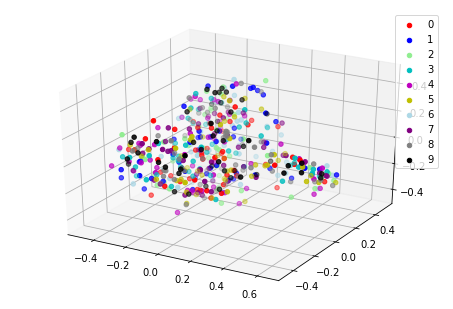

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

lim = 50

a = np.zeros((10,lim,3))

for n in range(0,10):
    m = 0
    for k in range(0,len(train_lbls)):
        if (train_lbls[k]==n):
            a[n][m] = X_kpca[k]
            m+=1
        if (m==lim):
            break
            
fig = plt.figure()
ax = ax = Axes3D(fig)

ax.scatter(a[0,:,0], a[0,:,1], a[0,:,2], label='0', c='r')
ax.scatter(a[1,:,0], a[1,:,1], a[1,:,2], label='1', c='b')
ax.scatter(a[2,:,0], a[2,:,1], a[2,:,2], label='2', c='lightgreen')
ax.scatter(a[3,:,0], a[3,:,1], a[3,:,2], label='3', c='c')
ax.scatter(a[4,:,0], a[4,:,1], a[4,:,2], label='4', c='m')
ax.scatter(a[5,:,0], a[5,:,1], a[5,:,2], label='5', c='y')
ax.scatter(a[6,:,0], a[6,:,1], a[6,:,2], label='6', c='lightblue')
ax.scatter(a[7,:,0], a[7,:,1], a[7,:,2], label='7', c='purple')
ax.scatter(a[8,:,0], a[8,:,1], a[8,:,2], label='8', c='gray')
ax.scatter(a[9,:,0], a[9,:,1], a[9,:,2], label='9', c='black')

plt.legend()
plt.show()

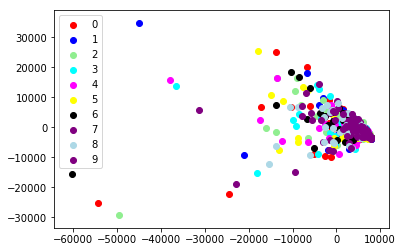

In [14]:
# lim = 50

# a = np.zeros((10,lim,2))

# for n in range(0,10):
#     m = 0
#     for k in range(0,len(train_lbls)):
#         if (train_lbls[k]==n):
#             a[n][m] = X_kpca[k]
#             m+=1
#         if (m==lim):
#             break
            
# plt.scatter(a[0,:,0], a[0,:,1], label='0', c='red')
# plt.scatter(a[1,:,0], a[1,:,1], label='1', c='blue')
# plt.scatter(a[2,:,0], a[2,:,1], label='2', c='lightgreen')
# plt.scatter(a[3,:,0], a[3,:,1], label='3', c='cyan')
# plt.scatter(a[4,:,0], a[4,:,1], label='4', c='magenta')
# plt.scatter(a[5,:,0], a[5,:,1], label='5', c='yellow')
# plt.scatter(a[6,:,0], a[6,:,1], label='6', c='black')
# plt.scatter(a[7,:,0], a[7,:,1], label='7', c='purple')
# plt.scatter(a[8,:,0], a[8,:,1], label='8', c='lightblue')
# plt.scatter(a[9,:,0], a[9,:,1], label='9', c='purple')

# plt.legend()
# plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import cross_val_score

kpca = KernelPCA(kernel="cosine", n_components = 100)

kpca.fit(train_imgs)


MemoryError: 

### Finding the best PCA decomposition:

In [ ]:
# n_components = 630!!!

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
n_start = 10
n_end   = 700

segs = 3

while (n_end-n_start)>1:
    
    delta = round((n_end-n_start)/segs)
    
    pca_scores = []
    
    for k in range(0,segs+1):
        n = n_start + k*delta
        #print(type(n))
        pca = PCA(n_components=n)
        #a=(np.mean(cross_val_score(pca, test_imgs)))
        pca_scores.append(np.mean(cross_val_score(pca, train_imgs)))
    
    n_max = np.argmax(pca_scores)
    n_max = int(n_max.item())
    print(pca_scores[n_max],n_start+n_max*delta)
    
    if   n_max == 0:
        n_end = n_start + delta
    elif n_max == segs:
        n_start = n_end-delta
    else:
        n_end   = n_start + (n_max+1)*delta
        n_start = n_end - 2*delta
        
    